In [2]:
#System based imports
import sys
print(sys.version)

#Deep learning imports
import tensorflow as tf
import keras


#Scientific Learning Libraries
import pandas as pd 
import numpy as np
from sklearn.metrics import confusion_matrix

#Import mnist data library
mnist = keras.datasets.mnist

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]


In [4]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten


#Get MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
 
    
    
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape(-1,28,28,1)

In [4]:
#plt.imshow(x_train[9])


In [1]:
# model = tf.keras.models.Sequential([
#                          Conv2D(32, kernel_size = (5,5), activation = 'relu', strides = (1,1), 
#                                 padding = 'same', input_shape = (28,28,1)),
#                          MaxPooling2D(pool_size = (2,2), strides = (1,1)),
#                          Conv2D(64, kernel_size = (5,5), activation = 'relu', strides = (1,1)),
#                          MaxPooling2D(pool_size = (2,2), strides = (1,1)),
#                          Flatten(),
#                          Dense(1000, activation = 'relu'),
#                          Dense(10, activation = 'softmax')])

# x_train = x_train.reshape(60000,784)
# x_test = x_test.reshape(10000,784)

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(784, activation = tf.nn.relu, input_shape = (784,)),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

from keras.models import load_model
model = load_model('MNIST_conv_net.h5')

Using TensorFlow backend.


In [6]:
model.fit(x_train,y_train, epochs = 1)

Epoch 1/1
60000/60000 [==============================] - 55s 921us/step - loss: 0.1841 - acc: 0.9436


In [7]:
model.save("C:\\Users\\sshowalter\\Documents\\My_Documents\\Repos\\BA_Source_Code\\Neural_Networks\\MNIST_dense_net.h5")

In [5]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 28s 3ms/step


[0.034492243555606185, 0.9907]

In [24]:
results = model.predict_classes(x_test, verbose = 1)

10000/10000 [==============================] - 16s 2ms/step


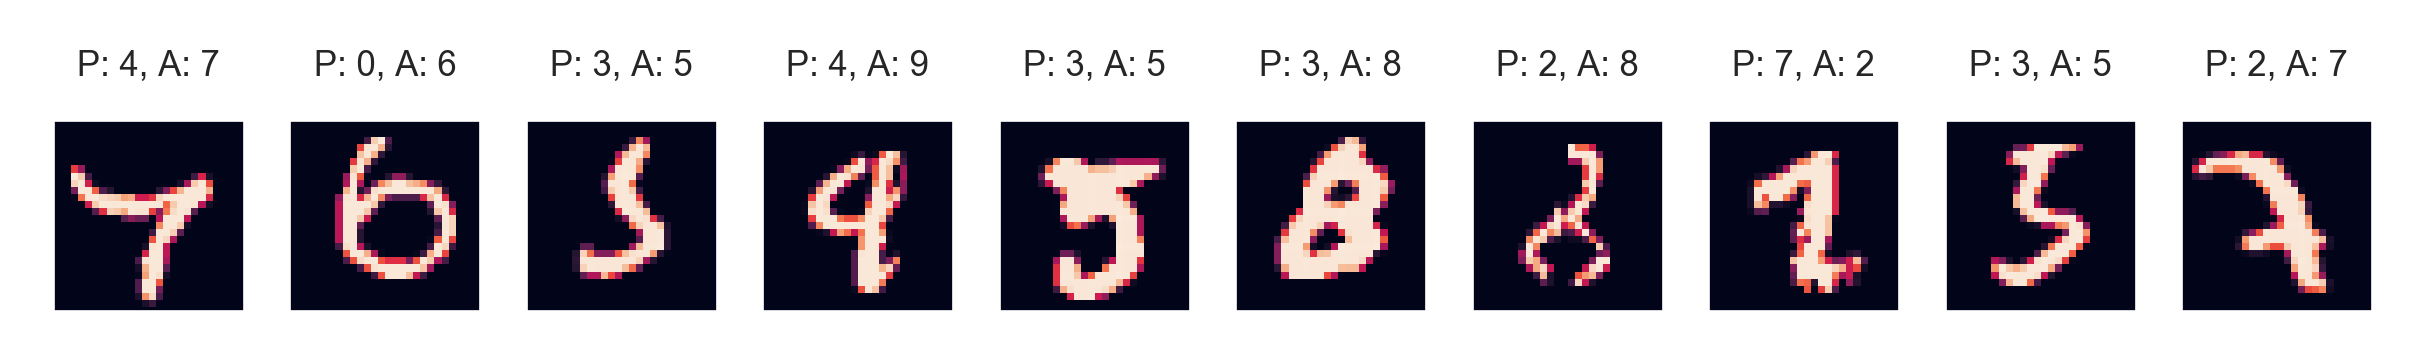

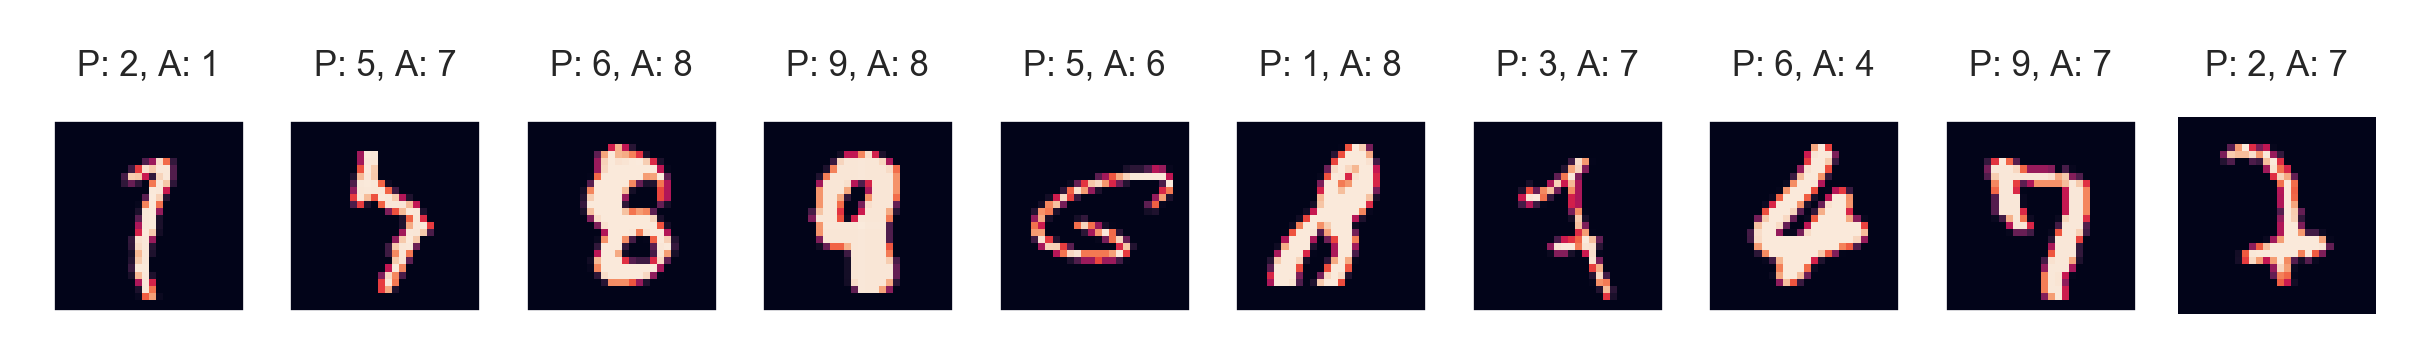

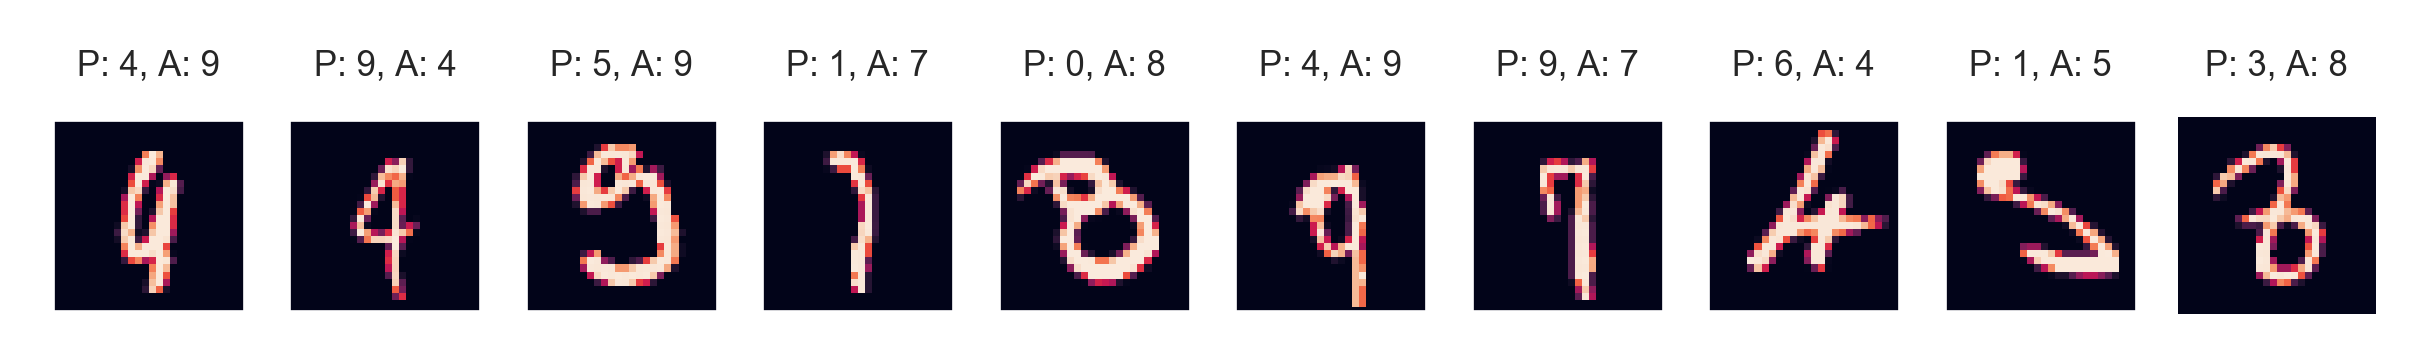

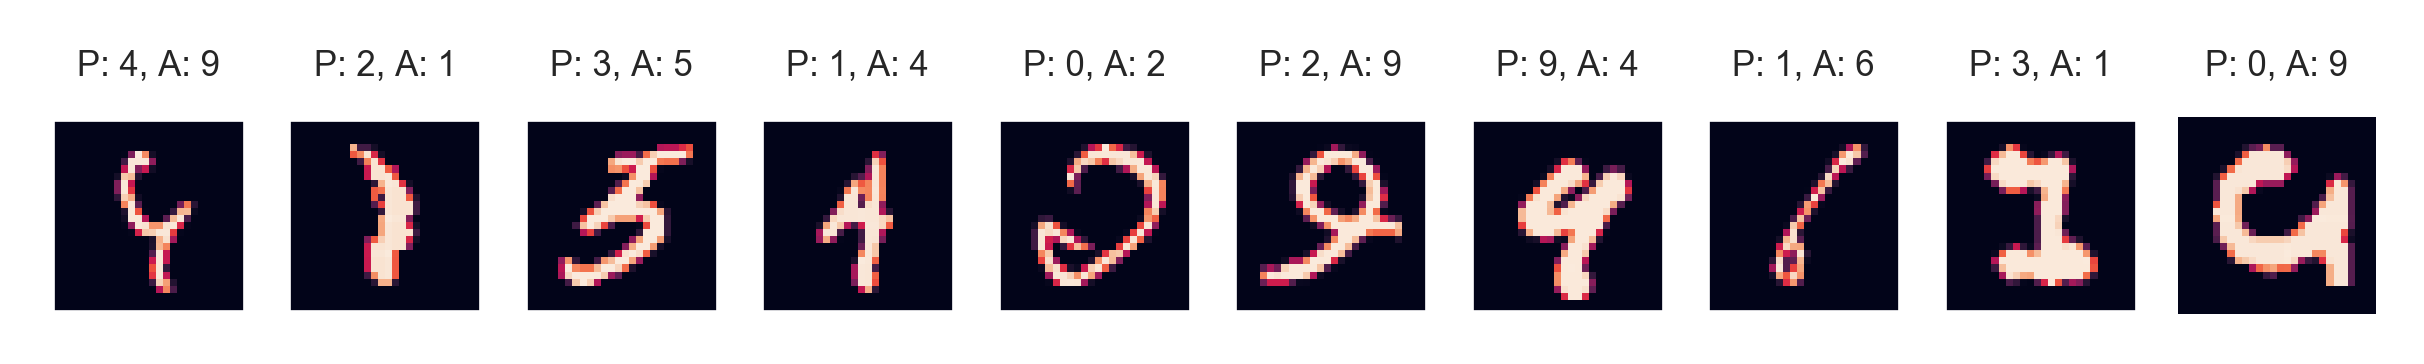

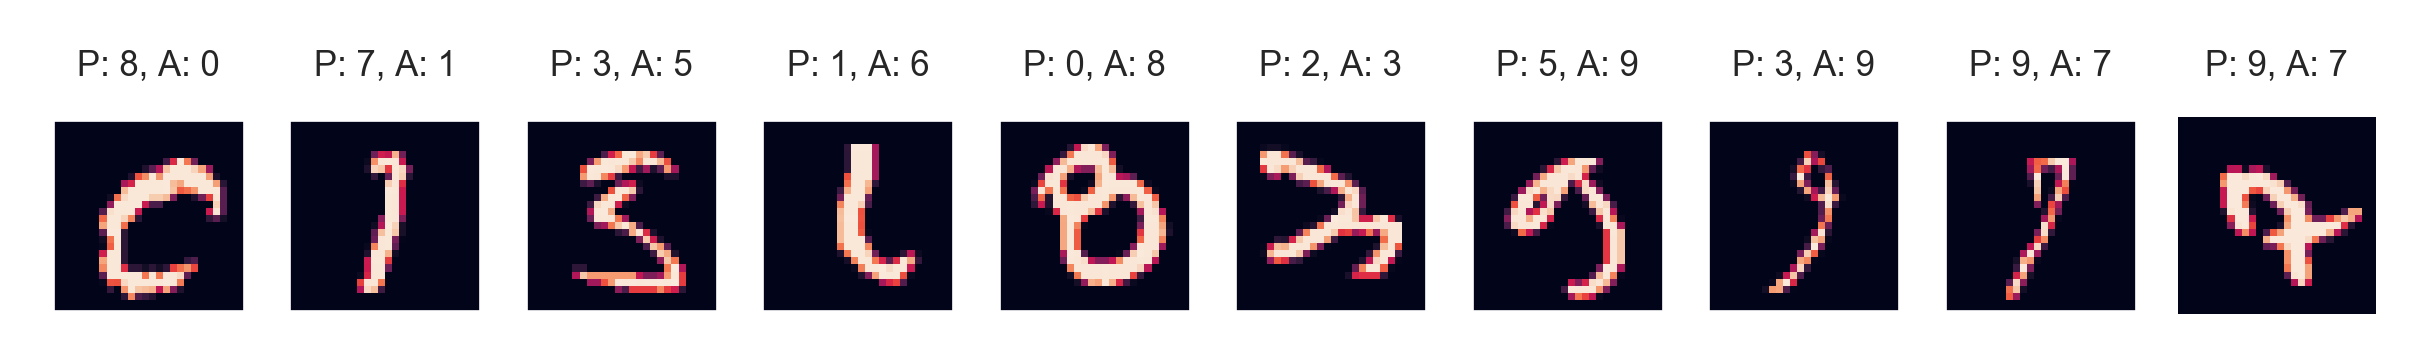

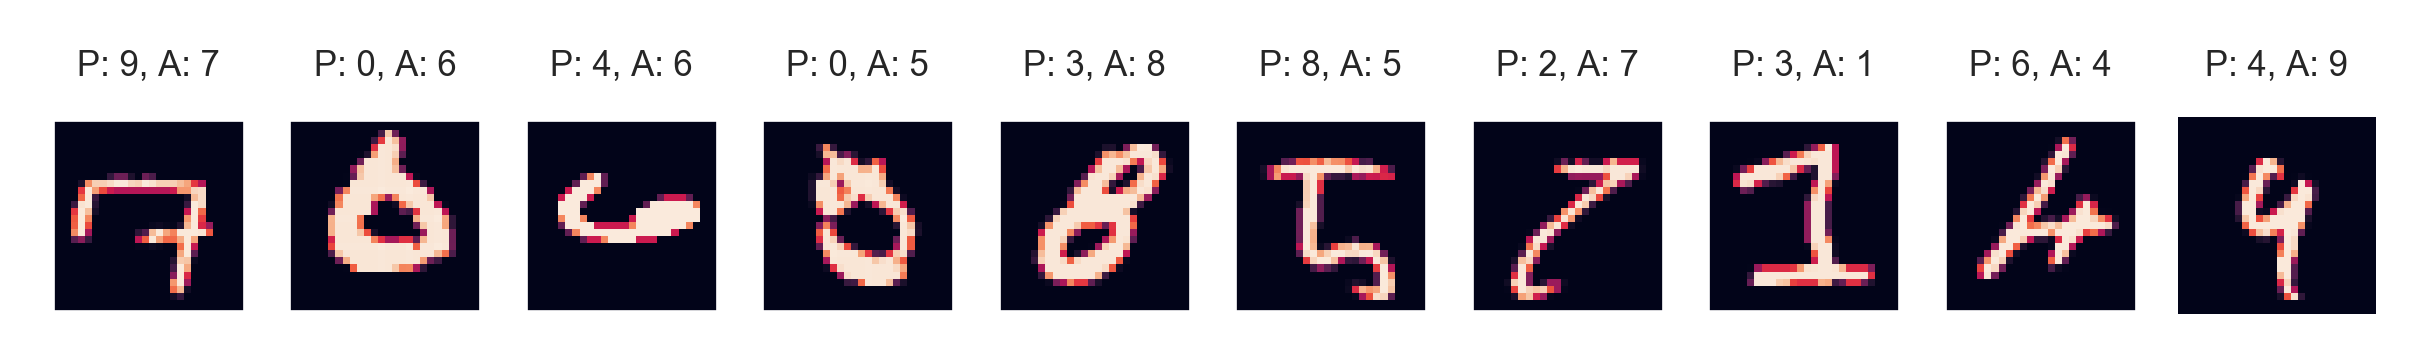

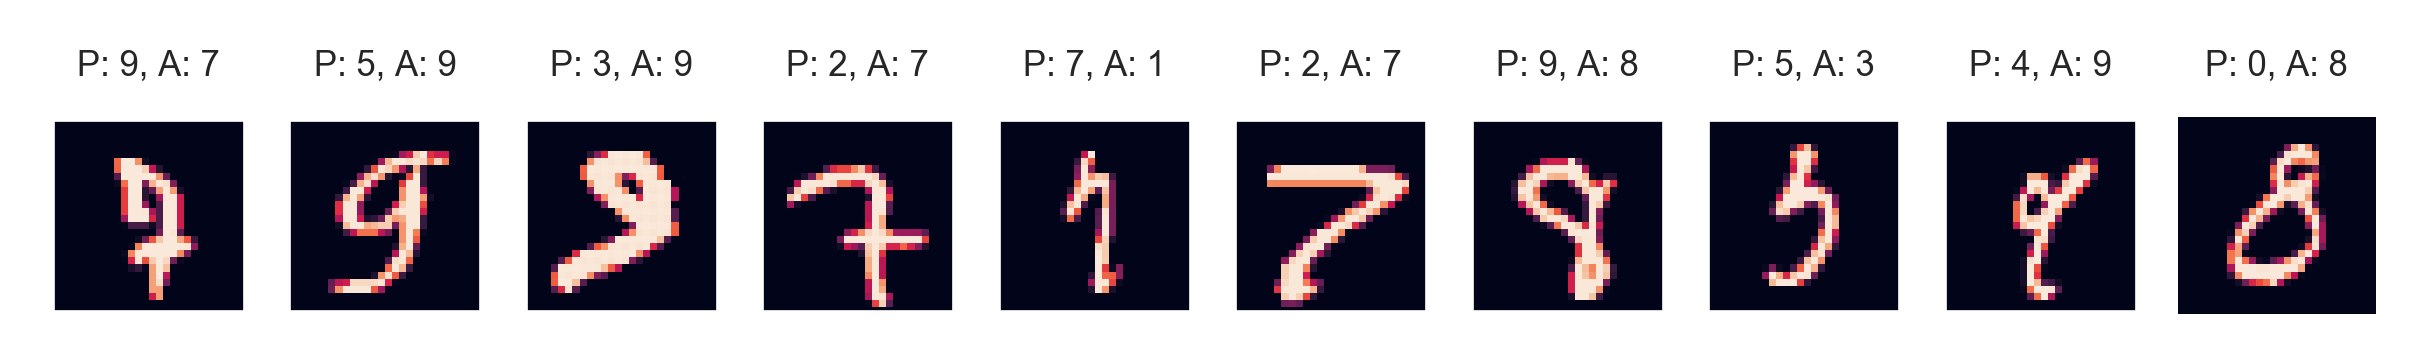

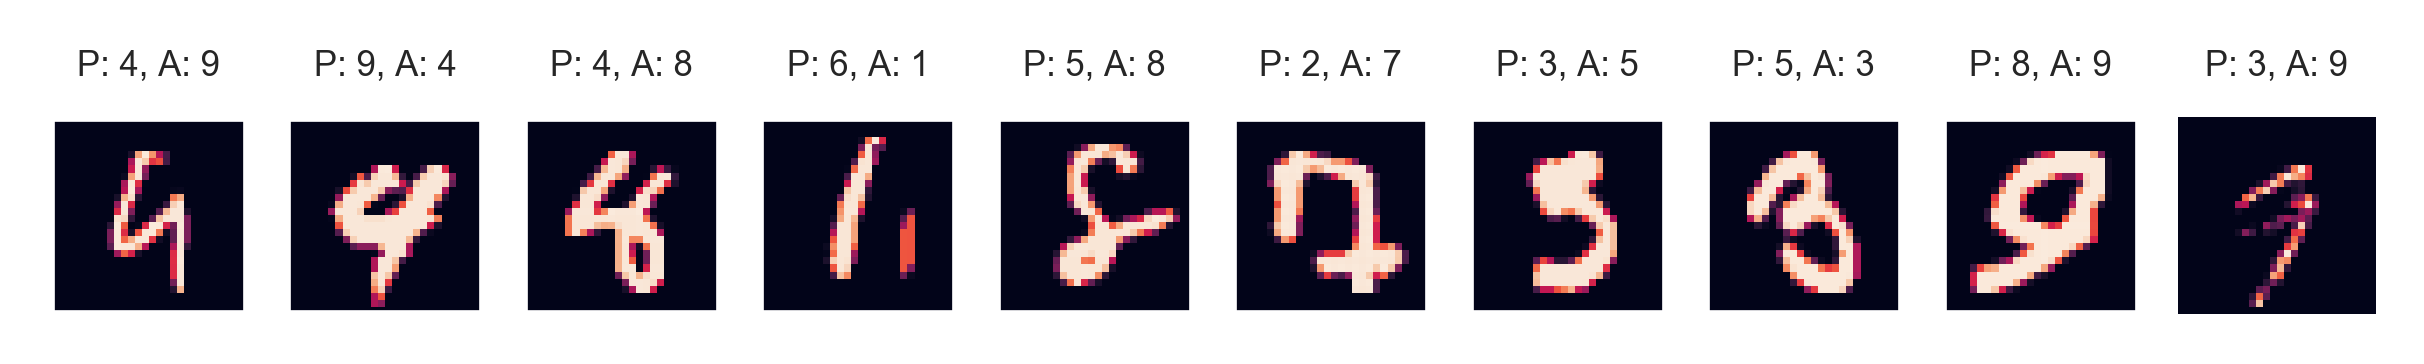

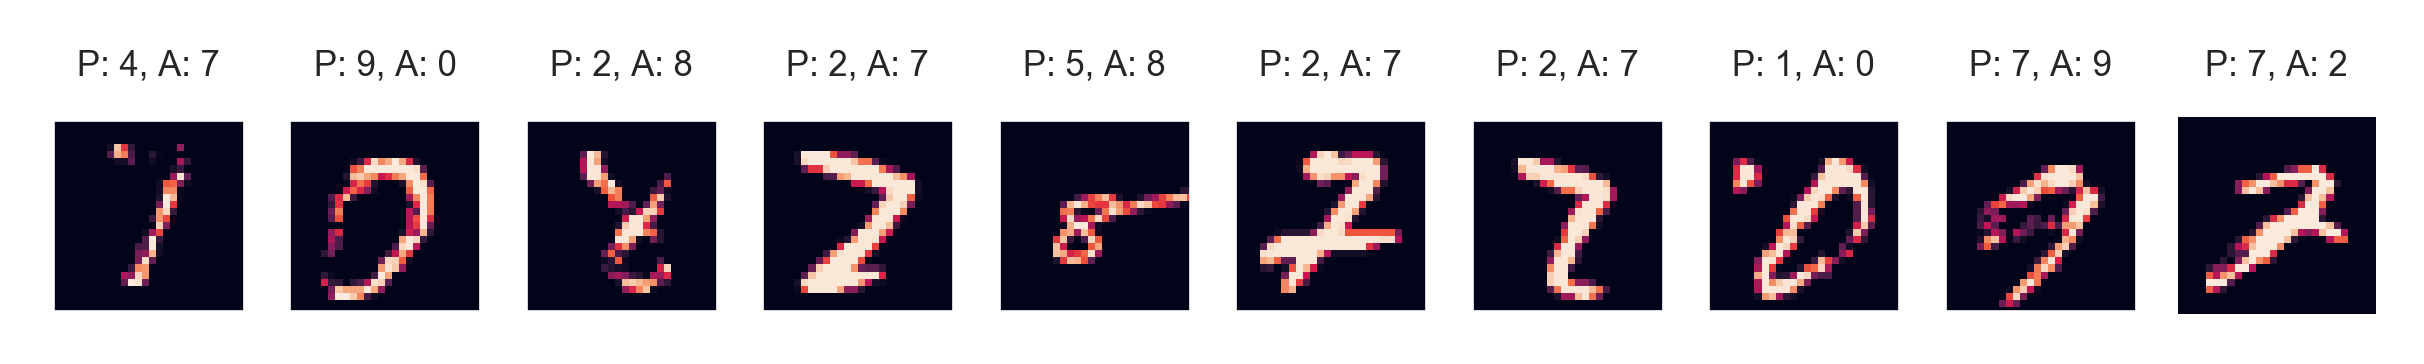

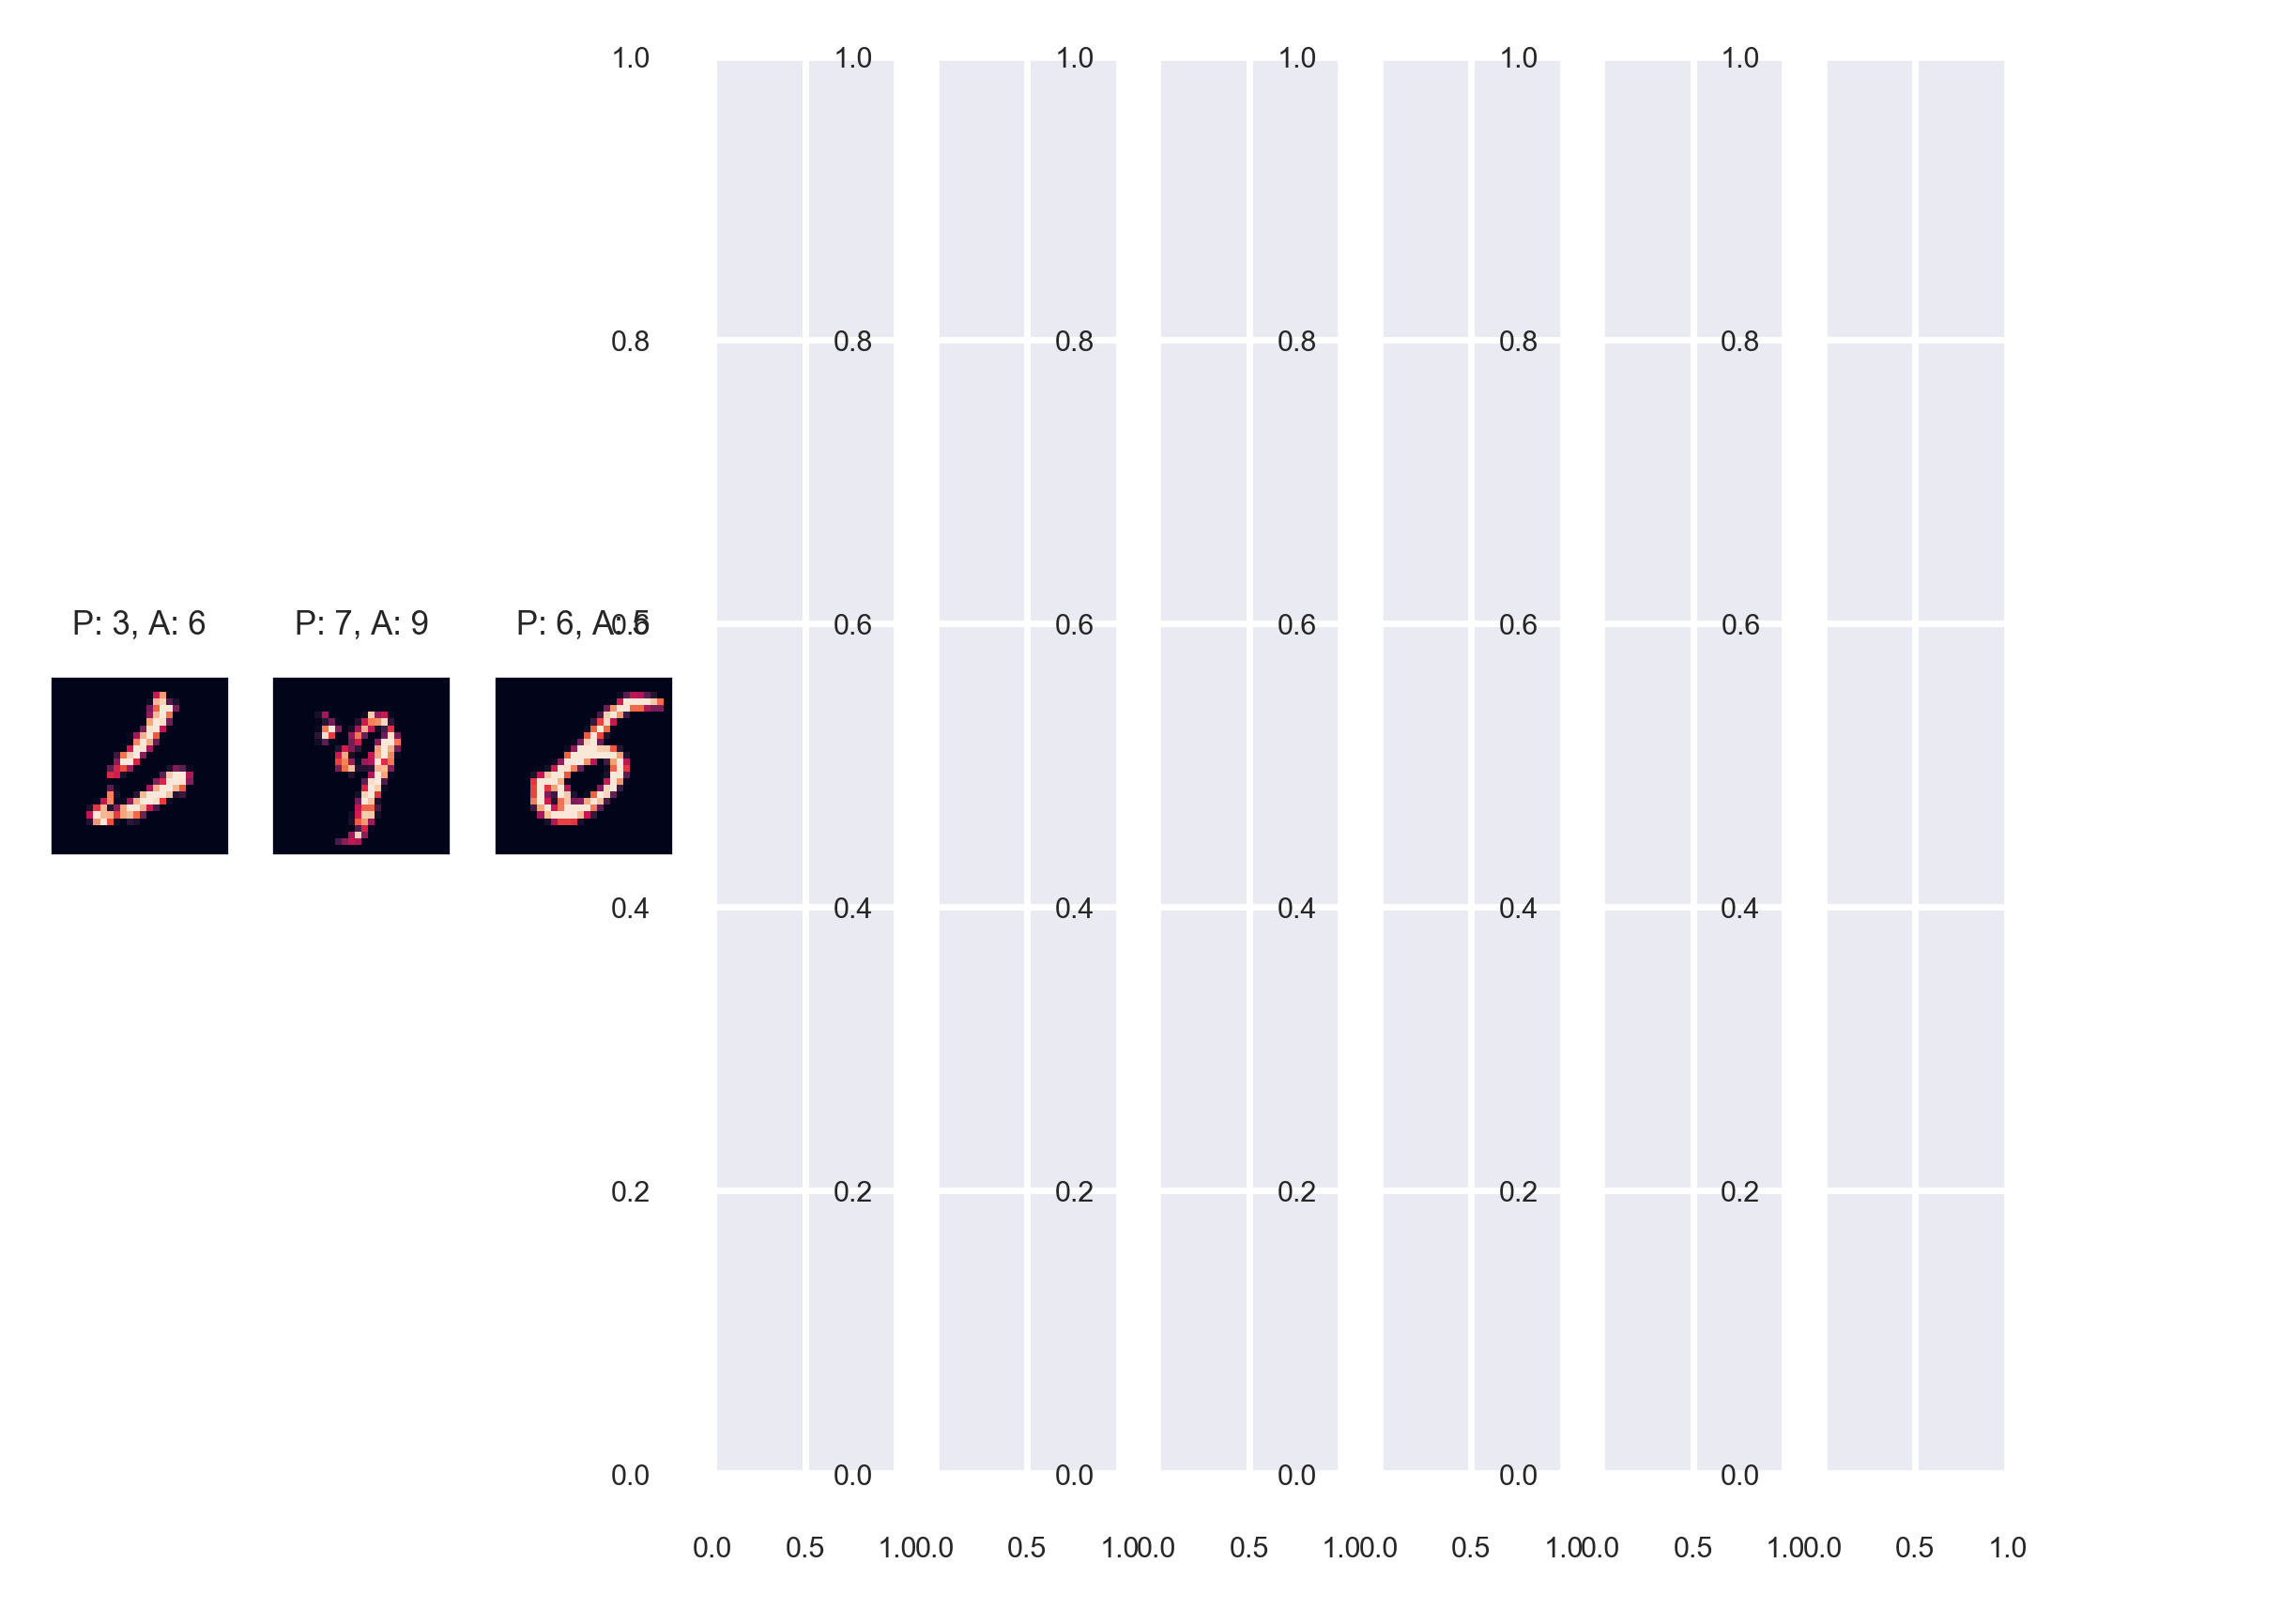

In [26]:
x_test = x_test.reshape((10000,28,28))

f,ax = plt.subplots(1,10)
ax[0].axes.get_xaxis().set_visible(False)
ax[0].axes.get_yaxis().set_visible(False)
# default_dpi = mpl.rcParamsDefault['figure.dpi']
# mpl.rcParams['figure.dpi'] = default_dpi*2
j = 0


for i in range(len(results) -3):
    if results[i] != y_test[i]:
        ax[j].imshow(x_test[i])
        ax[j].set_title("P: %s, A: %s"%(str(results[i]), str(y_test[i])), fontsize = 5)
        ax[j].axes.get_xaxis().set_visible(False)
        ax[j].axes.get_yaxis().set_visible(False)
        j += 1
        if j == 10:
            j = 0
            f, ax = plt.subplots(1,10)
            plt.axis('off')
            
            


    

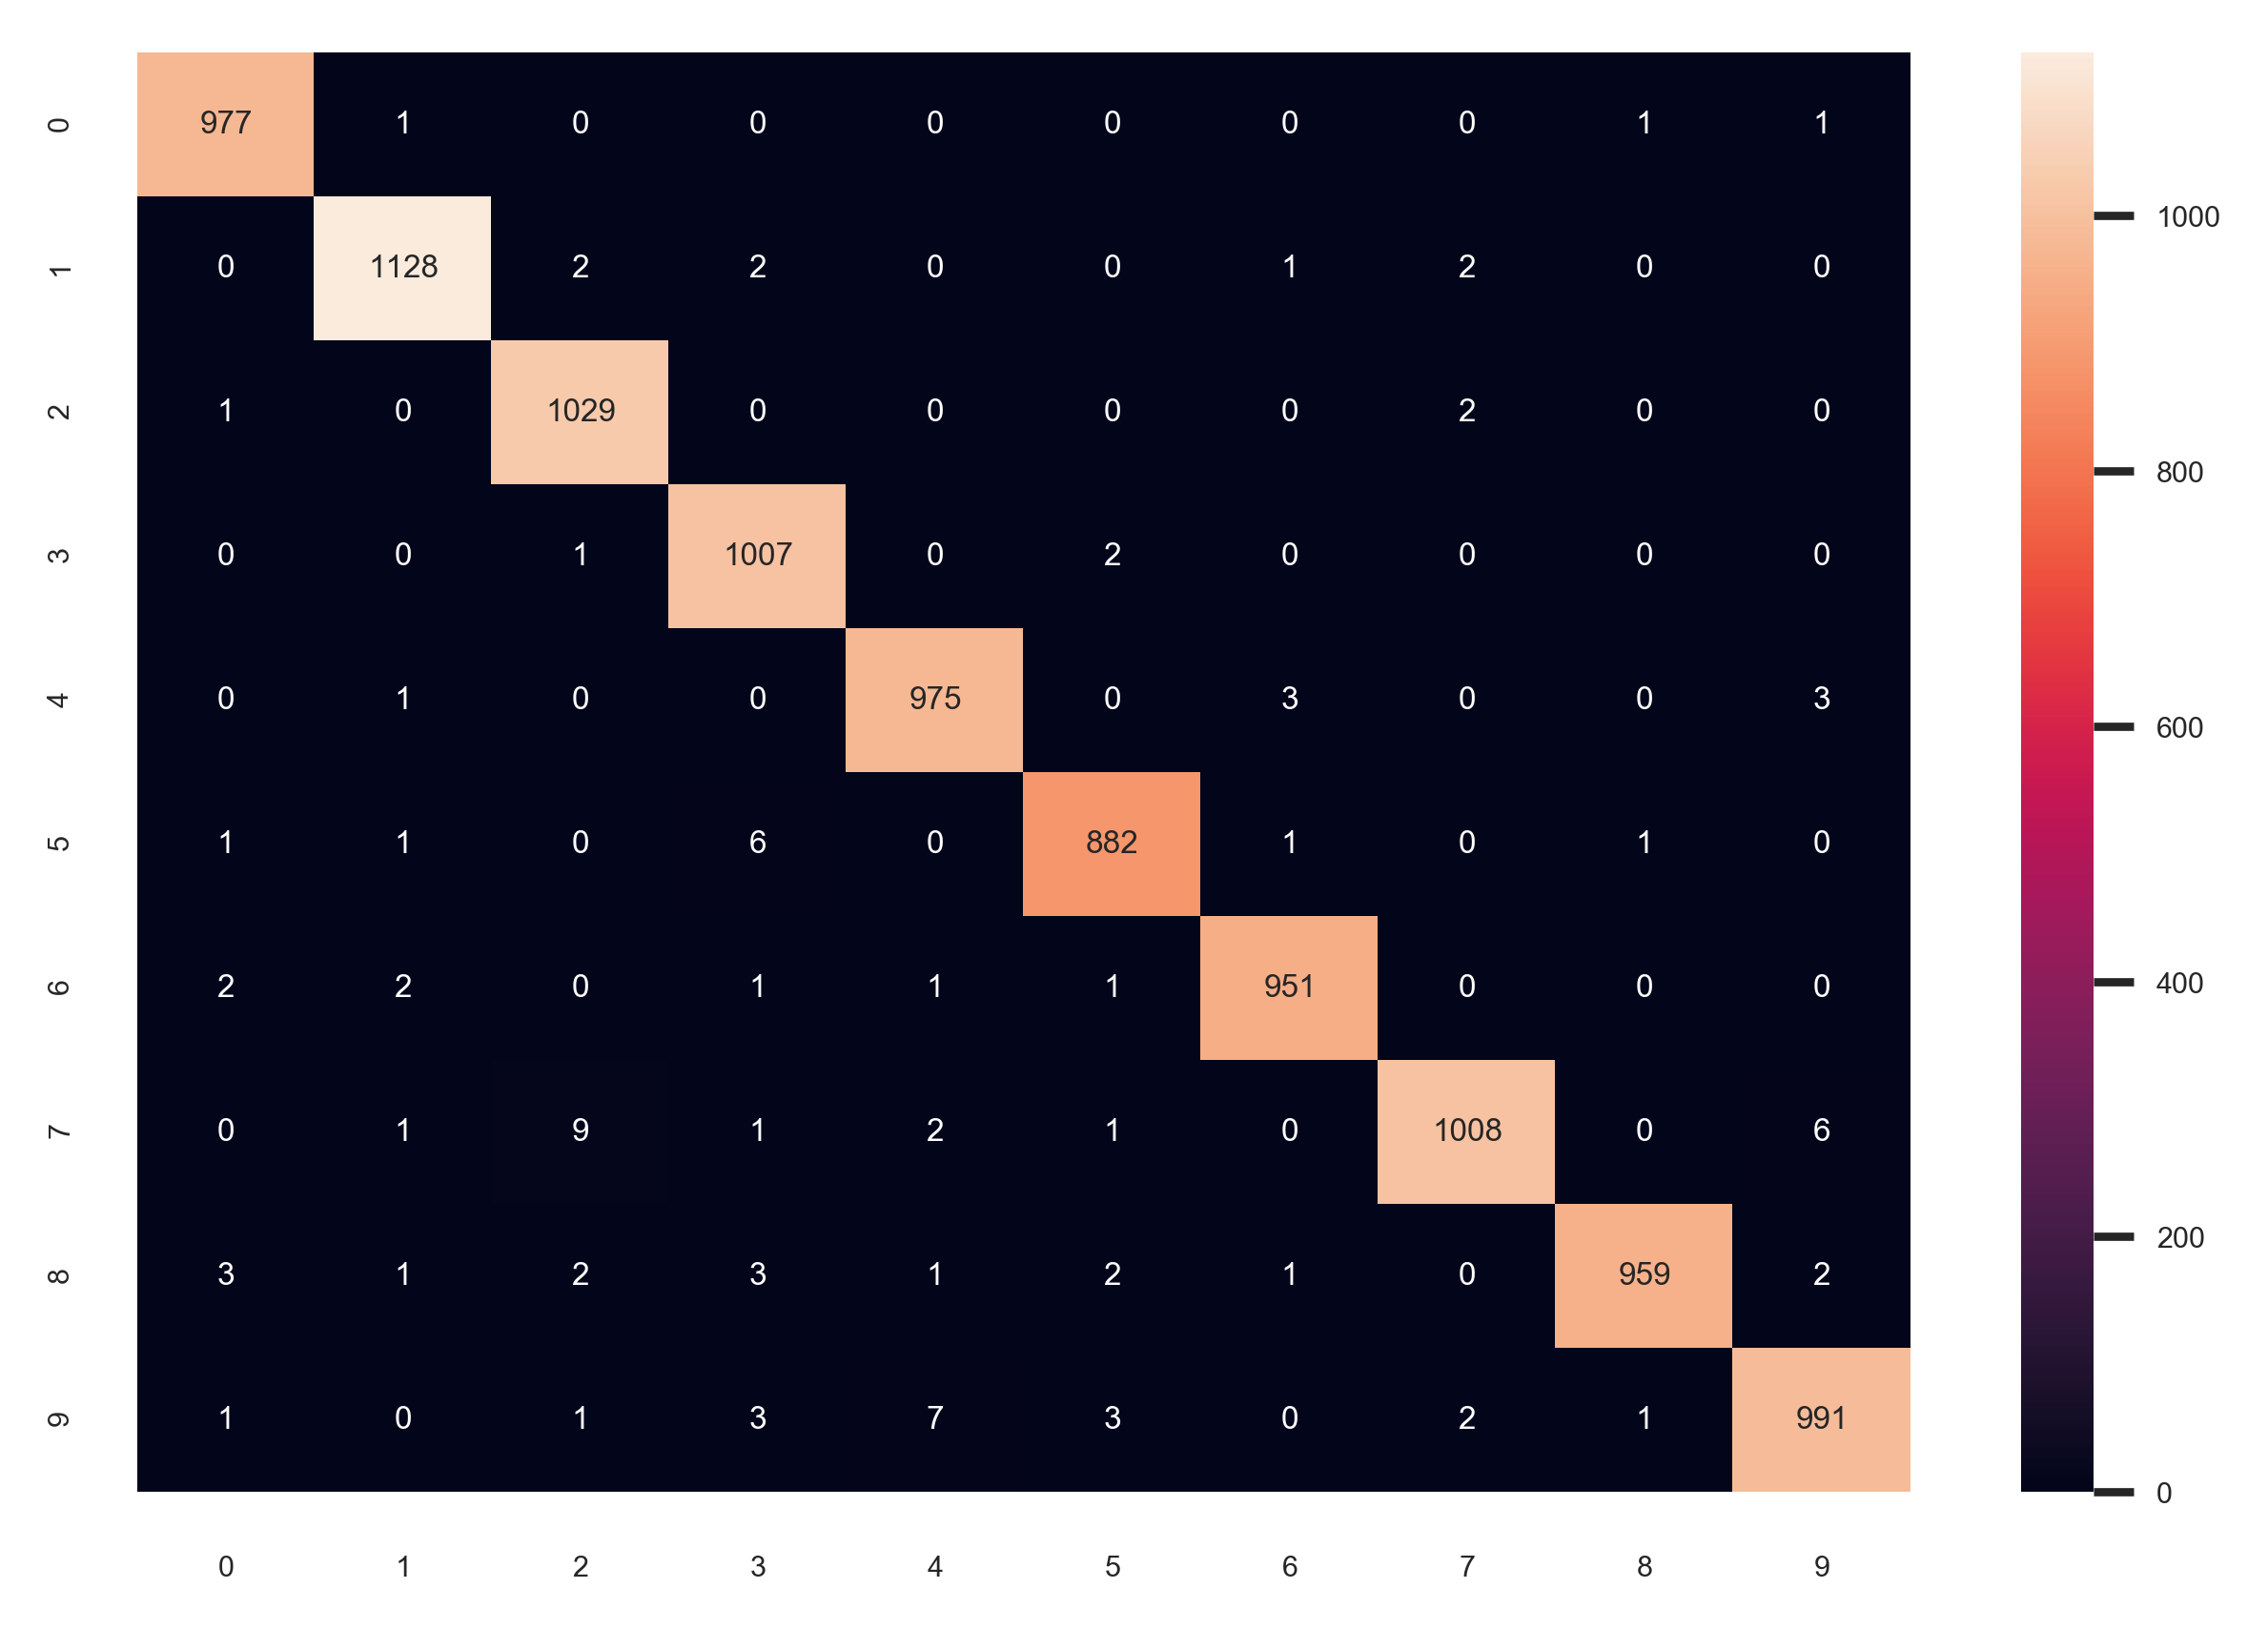

In [27]:
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*5

sns.set(font_scale=0.4)
final_results = pd.DataFrame(confusion_matrix(y_test,results))
sns.heatmap(final_results, annot = True, fmt='g')

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 23, 23, 64)        51264     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 30976)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 1000)              30977000  
_________________________________________________________________
dense_23 (Dense)             (None, 10)                10010     
Total para

# Here is some text
